<a href="https://colab.research.google.com/github/littlecanargie/EpidemicModeling/blob/main/20210127_Practice_2_clean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machinery (takes some time)

## Base packages

In [1]:
libraries = c("dplyr", "magrittr", "tidyr", "ggplot2", "readxl")  
for(x in libraries) { library(x, character.only=TRUE, warn.conflicts=FALSE, quietly=TRUE) }

install.packages("zoo"); library("zoo")

R.Version()$version.string

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




[1] "R version 4.0.3 (2020-10-10)"

In [2]:
# Step 1: install CmdStanR and only the packages that it directly depends on.
install.packages('versions')
library(versions)
# Install package CmdStanR from GitHub
library(devtools)
if(!require(cmdstanr)){
  devtools::install_github("stan-dev/cmdstanr", dependencies=c("Depends", "Imports"))
  library(cmdstanr)
}
# Step 2: download and untar the CmdStan binary for Google Colab instances
## Install CmdStan binaries
if (!file.exists("cmdstan-2.23.0.tgz")) {
  system("wget https://github.com/stan-dev/cmdstan/releases/download/v2.23.0/colab-cmdstan-2.23.0.tar.gz", intern=T)
  system("tar zxf colab-cmdstan-2.23.0.tar.gz", intern=T)
}
list.files("cmdstan-2.23.0")
# Step 3: Register the CmdStan install location
## Set cmdstan_path to CmdStan installation
set_cmdstan_path("cmdstan-2.23.0")
print_file <- function(file, nlines=-1L) {
  cat(paste(readLines(file, n=nlines), "\n", sep=""), sep="")
}
# will be used for postprocessing
if (!require("devtools")) {
  install.packages("devtools")
}
devtools::install_github("stan-dev/bayesplot")

library(posterior)
library(bayesplot)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: usethis

Loading required package: cmdstanr

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘cmdstanr’”



posterior  (NA -> 2c0a2f111...) [GitHub]
checkmate  (NA -> 2.0.0       ) [CRAN]
abind      (NA -> 1.4-5       ) [CRAN]
data.table (NA -> 1.13.6      ) [CRAN]


checkmate (NA -> 2.0.0) [CRAN]
abind     (NA -> 1.4-5) [CRAN]


Installing 2 packages: checkmate, abind

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



✔  checking for file ‘/tmp/RtmpwZJ3iy/remotes3e448442c/stan-dev-posterior-2c0a2f1/DESCRIPTION’
─  preparing ‘posterior’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  building ‘posterior_0.1.3.tar.gz’
   


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing 3 packages: checkmate, abind, data.table

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Skipping install of 'posterior' from a github remote, the SHA1 (2c0a2f11) has not changed since last install.
  Use `force = TRUE` to force installation



✔  checking for file ‘/tmp/RtmpwZJ3iy/remotes3e21fd5146/stan-dev-cmdstanr-3a26519/DESCRIPTION’
─  preparing ‘cmdstanr’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  building ‘cmdstanr_0.3.0.9000.tar.gz’
   


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

This is cmdstanr version 0.3.0.9000

- Online documentation and vignettes at mc-stan.org/cmdstanr

- Use set_cmdstan_path() to set the path to CmdStan

- Use install_cmdstan() to install CmdStan



character(0)

[1] "bin"                "examples"           "install-tbb.bat"   
 [4] "Jenkinsfile"        "lib"                "LICENSE"           
 [7] "make"               "makefile"           "README.md"         
[10] "runCmdStanTests.py" "src"                "stan"              
[13] "test-all.sh"

CmdStan path set to: /content/cmdstan-2.23.0




brio     (1.1.0 -> 1.1.1) [CRAN]
withr    (2.4.0 -> 2.4.1) [CRAN]
plyr     (NA    -> 1.8.6) [CRAN]
reshape2 (NA    -> 1.4.4) [CRAN]
ggridges (NA    -> 0.5.3) [CRAN]


Installing 5 packages: brio, withr, plyr, reshape2, ggridges

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



✔  checking for file ‘/tmp/RtmpwZJ3iy/remotes3e7f46d3f6/stan-dev-bayesplot-665c687/DESCRIPTION’
─  preparing ‘bayesplot’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  building ‘bayesplot_1.8.0.9000.tar.gz’
   


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

This is posterior version 0.1.3

This is bayesplot version 1.8.0.9000

- Online documentation and vignettes at mc-stan.org/bayesplot

- bayesplot theme set to bayesplot::theme_default()

   * Does _not_ affect other ggplot2 plots

   * See ?bayesplot_theme_set for details on theme setting


Attaching package: ‘bayesplot’


The following object is masked from ‘package:posterior’:

    rhat




# Loading the data

In [3]:
# loading datafile from GoogleDrive
## https://drive.google.com/file/d/12CuPCfO6N7ExvONty_8vUovjVqoB4orq/view?usp=sharing
## original source https://www.mdpi.com/1660-4601/17/20/7474/htm
system("gdown --id 12CuPCfO6N7ExvONty_8vUovjVqoB4orq")
list.files()

[1] "cmdstan-2.23.0"                "colab-cmdstan-2.23.0.tar.gz"  
[3] "sample_data"                   "Seoul_COVID19_DATA_import.csv"

In [4]:
df_ = read.csv("Seoul_COVID19_DATA_import.csv")
df_ %>% head

,number,symptom_day,confirm_day,infection_path
,<int>,<chr>,<chr>,<int>
1,1,20/1/10,20/1/24,1
2,2,20/1/26,20/1/30,1
3,3,20/1/26,20/1/30,2
4,4,20/1/26,20/1/30,1
5,5,20/1/30,20/1/31,2
6,6,20/1/29,20/1/31,2


In [5]:
df_ %>% mutate(across(c("symptom_day", "confirm_day"), as.Date),
          infection_path = if_else(infection_path==1, "imported", "local")) %>%
    rename(id = number, onset = symptom_day, confirmation = confirm_day) -> df
df %>% head

,id,onset,confirmation,infection_path
,<int>,<date>,<date>,<chr>
1,1,20-01-10,20-01-24,imported
2,2,20-01-26,20-01-30,imported
3,3,20-01-26,20-01-30,local
4,4,20-01-26,20-01-30,imported
5,5,20-01-30,20-01-31,local
6,6,20-01-29,20-01-31,local


Warning message:
“Removed 453 rows containing non-finite values (stat_count).”


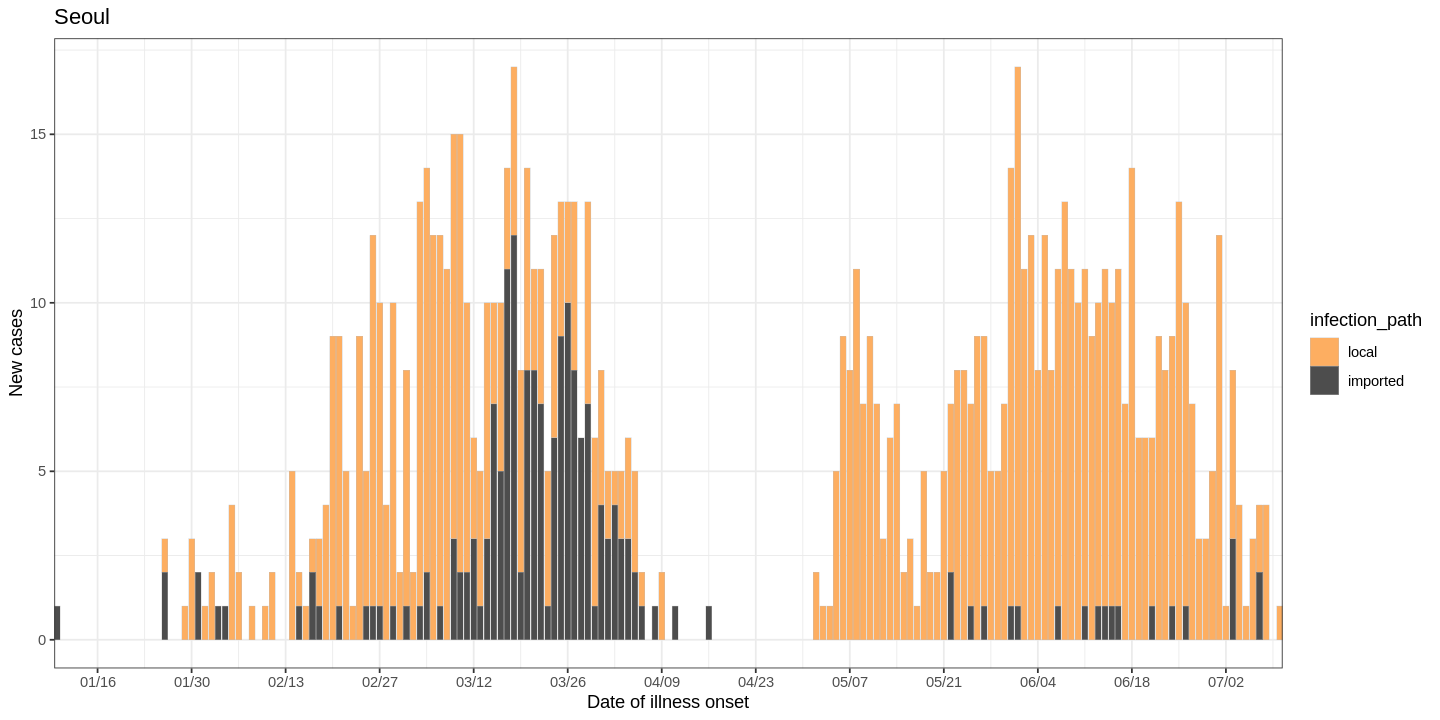

In [6]:
# plotting
options(repr.plot.width=12, repr.plot.height=6)
df %>% mutate(infection_path = factor(infection_path, levels=c("local", "imported"))) %>%
  ggplot(aes(onset)) + 
  geom_bar(aes(fill=infection_path), color="grey", size=.1) + 
  scale_fill_manual(values=c("#fdae61", "#4d4d4d")) +
  theme_bw() + 
  labs(x = "Date of illness onset", y="New cases", title="Seoul") + 
  scale_x_date(date_labels="%m/%d",date_breaks  = "14 days", expand = c(0, 0)) 

In [97]:
df %>% filter(!is.na(onset)) -> df.rm

df.rm %>% group_by(onset) %>% summarize(ntot = n()) %>% filter(!is.na(onset)) -> df.tot
df.rm %>% filter(infection_path == "local") %>% group_by(onset) %>% summarize(nloc = n()) %>% filter(!is.na(onset)) -> df.loc

Df <- data.frame(onset = as.Date(range(df.rm$onset)[1]: range(df.rm$onset)[2]))
Df %>% left_join(df.tot) %>% left_join(df.loc) %>% mutate(across(c(ntot, nloc), ~replace_na(., 0))) %>% mutate(nimp = ntot - nloc) -> Df

Joining, by = "onset"

Joining, by = "onset"



In [99]:
# Stan program
stan_code = "functions {
    /* calculating the convolutions */
    // X: first function, Yrev: reversed version of the second function
    // K: length of X and Yrev
    // the result is the vector of length K-1, because the first element equal zero is omitted
    vector convolution(vector X, vector Yrev, int K) {
        vector[K-1] res;
        res[1] = X[1]*Yrev[K];
        for (k in 2:K-1) 
            res[k] = dot_product(head(X, k), tail(Yrev, k)); // by definition of the convolution

        return res;        
    }
}

data {
 int<lower = 1> K; // number of days
 int<lower = 0> totcases[K]; // total cases per day
 int<lower = 0> loccases[K]; // local cases per day

 // Serial interval
 real param1_SI;
 real param2_SI;
}

transformed data {
  vector[K-1] conv;

  {
    vector[K] gt;
    vector[K] gt_rev; 

    // calculating the discrete version of the weibull distribution
    vector[K] gt_cdf;
    for (i in 1:K) 
      gt_cdf[i] = exp(weibull_lcdf(i | param1_SI, param2_SI));
    gt = append_row(gt_cdf[1], gt_cdf[2:K] - gt_cdf[1:(K-1)]);

    // reverting
    for (i in 1:K)
      gt_rev[i] = gt[K + 1 - i];

    conv = convolution(to_vector(totcases), gt_rev, K);
  }
}

parameters {
  // the vector of instantaneous reproduction numbers 
  vector<lower = 0>[K-1] Rt;
}

model {
  // prior distribution
  // if we take flat (non-informative prior), then we would obtain exactly MLE
  Rt ~ normal(5, 5);

  target += poisson_lpmf(tail(loccases, K-1) | Rt .* conv + 1e-8);
  // it is the same as to write: 
  //    tail(cases, K-1) ~ poisson(Rt .* conv + 1e-8)
  // which I showed during the class
  // it is up to you to choose
  // '_pmf' stands for 'probability mass function' b/c Poisson is discrete distribution
}"
stan_file = write_stan_file(stan_code)

# data file
## Serial interval is from Nishiura et al 2020 IJID
## https://doi.org/10.1016/j.ijid.2020.02.060
data_list = list(K = nrow(Df), totcases = Df$ntot, loccases = Df$nloc, param1_SI = 2.305, param2_SI = 5.452)
data_file = tempfile(fileext = ".json")
write_stan_json(data_list, data_file)

# Compile example model
mod = cmdstan_model(stan_file)

# Condition on data
## seed number is used for possible reproducibility
fit = mod$sample(data = data_file, iter_sampling=1000, iter_warmup=500, chains=3, seed=123) 

Compiling Stan program...



Running MCMC with 3 sequential chains...

Chain 1 Iteration:    1 / 1500 [  0%]  (Warmup) 
Chain 1 Iteration:  100 / 1500 [  6%]  (Warmup) 
Chain 1 Iteration:  200 / 1500 [ 13%]  (Warmup) 
Chain 1 Iteration:  300 / 1500 [ 20%]  (Warmup) 
Chain 1 Iteration:  400 / 1500 [ 26%]  (Warmup) 
Chain 1 Iteration:  500 / 1500 [ 33%]  (Warmup) 
Chain 1 Iteration:  501 / 1500 [ 33%]  (Sampling) 
Chain 1 Iteration:  600 / 1500 [ 40%]  (Sampling) 
Chain 1 Iteration:  700 / 1500 [ 46%]  (Sampling) 
Chain 1 Iteration:  800 / 1500 [ 53%]  (Sampling) 
Chain 1 Iteration:  900 / 1500 [ 60%]  (Sampling) 
Chain 1 Iteration: 1000 / 1500 [ 66%]  (Sampling) 
Chain 1 Iteration: 1100 / 1500 [ 73%]  (Sampling) 
Chain 1 Iteration: 1200 / 1500 [ 80%]  (Sampling) 
Chain 1 Iteration: 1300 / 1500 [ 86%]  (Sampling) 
Chain 1 Iteration: 1400 / 1500 [ 93%]  (Sampling) 
Chain 1 Iteration: 1500 / 1500 [100%]  (Sampling) 
Chain 1 finished in 1.2 seconds.
Chain 2 Iteration:    1 / 1500 [  0%]  (Warmup) 
Chain 2 Iteration:  1

In [100]:
output_ = fit$summary(c("Rt"), ~quantile(.x, probs = c(0.5, 0.025, 0.975))) %>% as.data.frame
names(output_) = c("variable", "Rt", "Rt_lower", "Rt_upper")
output_ %>% head

,variable,Rt,Rt_lower,Rt_upper
,<chr>,<dbl>,<dbl>,<dbl>
1,Rt[1],5.651535,0.5018524,14.67984
2,Rt[2],4.857620,0.3841624,13.67961
3,Rt[3],4.085130,0.1965985,12.80547
4,Rt[4],3.746110,0.2227535,12.00866
5,Rt[5],3.484665,0.1925147,11.89109
6,Rt[6],3.702435,0.1963196,12.01126


In [101]:
# Here is some technical thing: to extract the number inside the brackets
## for example: Rt[1] will be separated on variable="Rt" and index=1
out = stringr::str_match_all(output_$variable, "[\\d+(.*)]")
output_$index = sapply(out, function(x) as.numeric(paste(x[,1],collapse="")))
output_ %>% 
  mutate(variable = stringr::str_extract(variable, "^[^\\[]+"), onset = as.Date("20-01-10") + index) %>% 
  select(variable, onset, everything(), -index, -variable) -> output
output %>% head

,onset,Rt,Rt_lower,Rt_upper
,<date>,<dbl>,<dbl>,<dbl>
1,20-01-11,5.651535,0.5018524,14.67984
2,20-01-12,4.857620,0.3841624,13.67961
3,20-01-13,4.085130,0.1965985,12.80547
4,20-01-14,3.746110,0.2227535,12.00866
5,20-01-15,3.484665,0.1925147,11.89109
6,20-01-16,3.702435,0.1963196,12.01126


In [102]:
output %<>% right_join(Df, by='onset')
output %>% head

,onset,Rt,Rt_lower,Rt_upper,ntot,nloc,nimp
,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,20-01-11,5.651535,0.5018524,14.67984,0,0,0
2,20-01-12,4.857620,0.3841624,13.67961,0,0,0
3,20-01-13,4.085130,0.1965985,12.80547,0,0,0
4,20-01-14,3.746110,0.2227535,12.00866,0,0,0
5,20-01-15,3.484665,0.1925147,11.89109,0,0,0
6,20-01-16,3.702435,0.1963196,12.01126,0,0,0


Warning message:
“Removed 2 row(s) containing missing values (geom_path).”


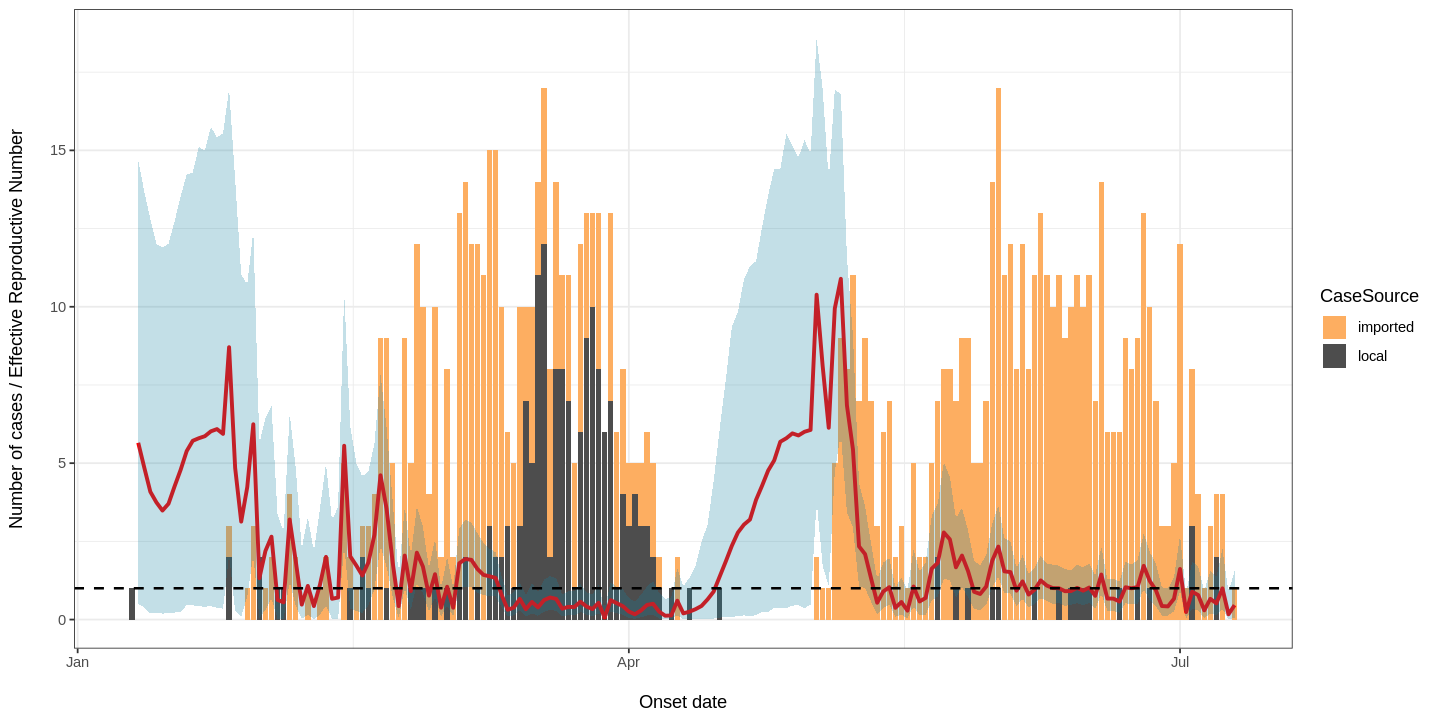

In [107]:
scaling_parameter = 1

options(repr.plot.width=12, repr.plot.height=6)
output2 <- output
output2$nimp <- output$nloc
output$CaseSource <- "local"
output2$CaseSource <- "imported"
output3 <- rbind(output, output2)
output3 %>% ggplot(aes(onset)) + 
  geom_bar(aes(y=nimp, x=onset, fill=CaseSource), stat="identity", size=1.1) + 
  scale_fill_manual(values=c("#fdae61", "#4d4d4d")) +
  geom_line(aes(y=Rt*scaling_parameter), color="red", size=1.1) +
  geom_ribbon(aes(ymax=Rt_upper, ymin=Rt_lower), fill="#1380A1", alpha = 0.25) +
  geom_hline(yintercept=1, linetype="dashed", color = "black", size = 0.7) + 
  labs(x="\nOnset date", y="Number of cases / Effective Reproductive Number\n") +
  theme_bw()